# Salary Predictions Based on Job Descriptions

# Part 1 - Defining the Problem 

### What are the salaries of new job postings? 

The purpose of this project is to make accurate salary predictions based on known salaries. This model will serve as a guide for offering competitive compensations based on job features provided. 

In [182]:
#import your libraries
import pandas as pd
import sklearn as sk
import pandas as dp
import numpy as np      
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#my info
__author__ = "Natalia"
__email__ = "natalianino06@gmailcom"

## Part 2 - DISCOVER

### Loading the raw data and verifying data 

In [183]:
train_features = pd.read_csv(r"C:\Users\Visions Electronics\Documents\data\train_features.csv")
train_salaries = pd.read_csv(r"C:\Users\Visions Electronics\Documents\data\train_salaries.csv")
test_features = pd.read_csv(r"C:\Users\Visions Electronics\Documents\data\test_features.csv")

In [184]:
train_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [185]:
train_salaries.head(5)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [186]:
train_features.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In order to have the 'picture' the training features & training salaries will be joined. The testing features will be used to test the model once completed. 

In [187]:
train_data = pd.merge(train_features, train_salaries, on = "jobId" )

In [188]:
train_data.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 3 Clean the data ----

In order to clean the data I will look to see if there missing data, any values in the salary variable that are not meaningful (0 or negative salaries) and check the type for each variable. 

In [189]:
##missing data 
missing_data = train_data.isnull().sum()
print(missing_data)

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64


In [190]:
##checking for negative or 0 value in salaries 
zero_salary = train_data["salary"]<=0
invalid_salary = train_data[zero_salary]
invalid_salary

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [191]:
##drop invalid salaries 
train_data = train_data.drop(invalid_salary.index.tolist())

In [192]:
print(train_data.dtypes)

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object


In [193]:
##transformation of variable types 
train_data['jobId'] = pd.Categorical(train_data['jobId'])
train_data['companyId'] = pd.Categorical(train_data['companyId'])
train_data['jobType'] = pd.Categorical(train_data['jobType'])
train_data['degree'] = pd.Categorical(train_data['degree'])
train_data['major'] = pd.Categorical(train_data['major'])
train_data['industry'] = pd.Categorical(train_data['industry'])
train_data.dtypes

jobId                  category
companyId              category
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

# Part 3: Exploratory Data Analysis 

Descriptive Statistics on quantitative data: 

In [194]:
#summarize int variables including salary (target variable)
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


The count has 999,995 which makes sense, since invalid salaries were removed. Mean and standard deviation seem reasonable to continue and min and max are also wihtin in reasonable values. 

In [195]:
#look for correlation between each feature and the target
train_data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


Miles from metrolopis and salary have a negative correlation (-0.297) 
Salary and years of experience have a positive correlation (0.375)

Normal distribution of salary: 

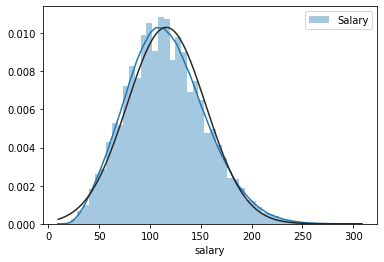

In [196]:
sns.distplot(train_data['salary'], fit=norm, label='Salary')
plt.legend()

Using years of experience as a predictor of salary: 

(0, 315.21335540838845)

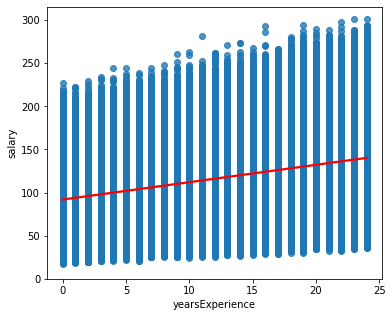

In [197]:
# Plot regression line on years of experience
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='yearsExperience', y='salary', data=train_data, line_kws={'color':'red'})
plt.ylim(0,)

The positive correlation is not as strong, which was suspected from the correlation above and the data seems to be widely spread

(0, 315.21335540838845)

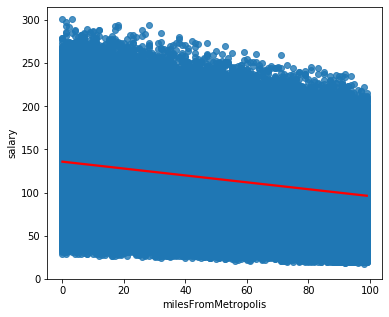

In [198]:
# Plot regression line on miles from metropolis 
width = 6
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x='milesFromMetropolis', y='salary', data=train_data, line_kws={'color':'red'})
plt.ylim(0,)

Salary by company ID (Are there differences in salary based on company and job type?)

In [199]:
train_data_pivots = train_data.pivot_table(index='companyId', columns='jobType', values='salary')
train_data_pivots

jobType,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT
companyId,,,,,,,,
COMP0,144.693320,135.460674,135.174960,70.612705,96.569827,115.838305,105.330697,124.635732
COMP1,144.917731,134.557271,135.584980,70.978899,95.817444,115.510802,104.245377,125.650939
COMP10,146.515657,134.690890,135.153025,70.883848,95.133198,114.698522,106.229459,125.651568
COMP11,144.134702,135.304603,136.367988,71.392911,95.804192,114.172959,105.741629,125.935533
COMP12,146.007000,134.625456,135.704691,70.646912,94.764895,116.148390,104.990447,125.020070
...,...,...,...,...,...,...,...,...
COMP61,147.183528,135.274145,135.769309,71.840039,96.243816,115.450409,105.400408,124.993921
COMP62,146.728414,134.937028,135.486680,70.740488,96.560976,117.280284,105.392273,124.758483
COMP7,145.142637,134.875712,134.577020,70.025154,95.476697,115.290256,105.232394,126.241888


The pivot table makes it hard to visualize any differences in job type and company. A box blot will be created to further visualize. 

In [200]:
train_data_pivots.describe()

jobType,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,145.313407,135.458834,135.480841,70.812473,95.332708,115.366690,105.488889,125.370796
std,0.855174,0.759772,0.747521,0.527044,0.622318,0.685821,0.712628,0.613353
min,143.252708,133.896570,133.918050,69.481382,93.744734,114.172959,103.640387,123.956219
25%,144.899535,134.937870,134.848773,70.559691,94.868538,114.844998,105.113722,124.936427
50%,145.362887,135.345038,135.555171,70.740627,95.242316,115.382411,105.500000,125.341850
75%,145.779116,135.893979,135.963034,71.124256,95.807800,115.846214,106.100909,125.797808
max,147.632727,137.330107,137.123925,71.996976,96.569827,117.280284,107.143808,126.814834


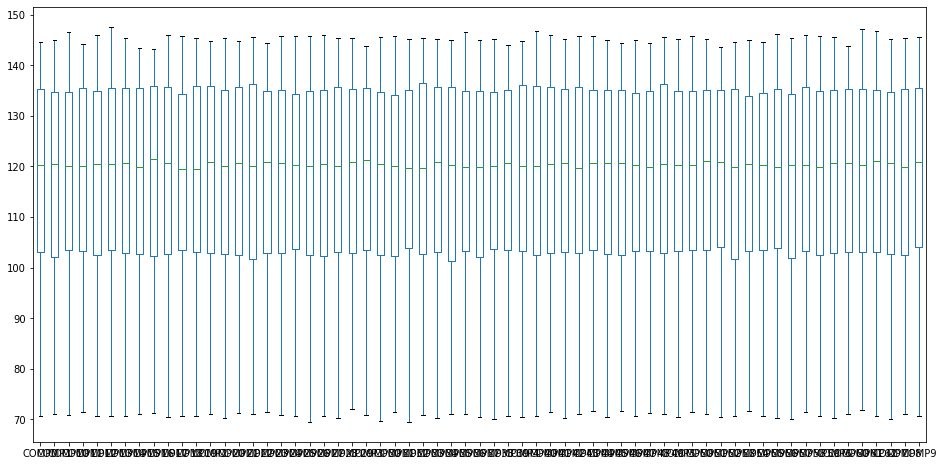

In [201]:
train_data_pivots = train_data.pivot_table(index='jobType', columns='companyId', values='salary')
train_data_pivots.plot(kind='box', figsize = [16, 8])

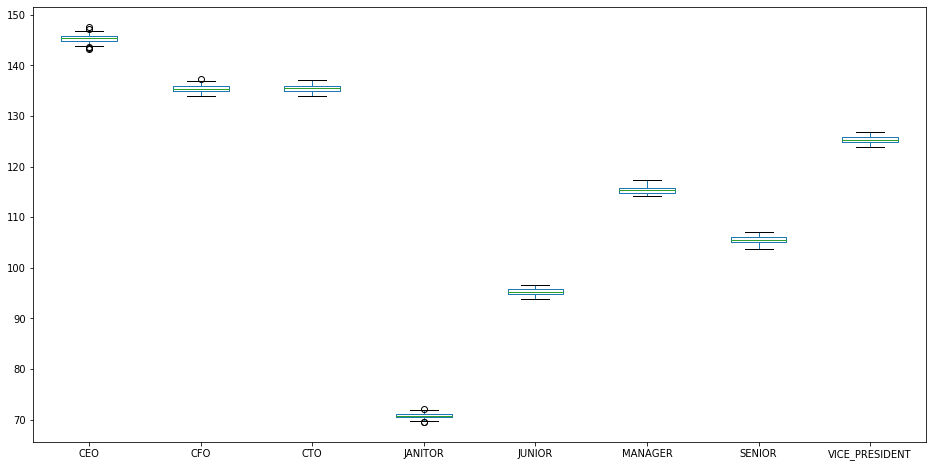

In [202]:
train_data_pivots = train_data.pivot_table(index='companyId', columns='jobType', values='salary')
train_data_pivots.plot(kind='box', figsize = [16, 8])

Company ID does not seem to have any significance in salary but job type does. The highest salaries are for CEO, CFO and CTO. The lowest is Janitor. The distribution for salaries by job type seem to be normally distributed. 

How is the salary based on the following degree, major and industry distributed? 

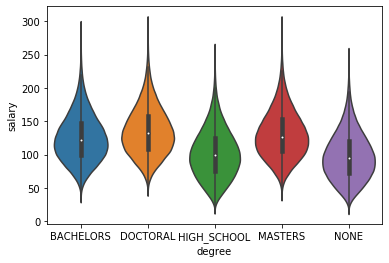

In [203]:
violinplot = sns.violinplot(x="degree", y="salary", data=train_data)

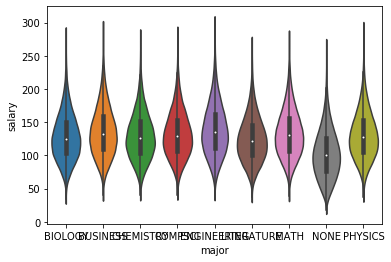

In [204]:
violinplot = sns.violinplot(x="major", y="salary", data=train_data)

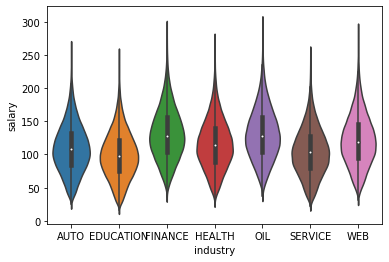

In [205]:
violinplot = sns.violinplot(x="industry", y="salary", data=train_data)

None has a clear lower salary compared to other majors. 

In [206]:
## dummy variables for categorical variables in train_data
train_data= pd.get_dummies(train_data, columns=['jobType'])
train_data= pd.get_dummies(train_data, columns=['major'])
train_data= pd.get_dummies(train_data, columns=['industry'])
train_data.head(5)

,jobId,companyId,degree,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,COMP37,MASTERS,10,83,130,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,COMP19,HIGH_SCHOOL,3,73,101,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,COMP52,DOCTORAL,10,38,137,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,COMP38,DOCTORAL,8,17,142,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,COMP7,BACHELORS,8,16,163,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
train_data.drop('jobId', axis=1, inplace=True)
train_data.drop('companyId', axis=1, inplace=True)
train_data.head(5)

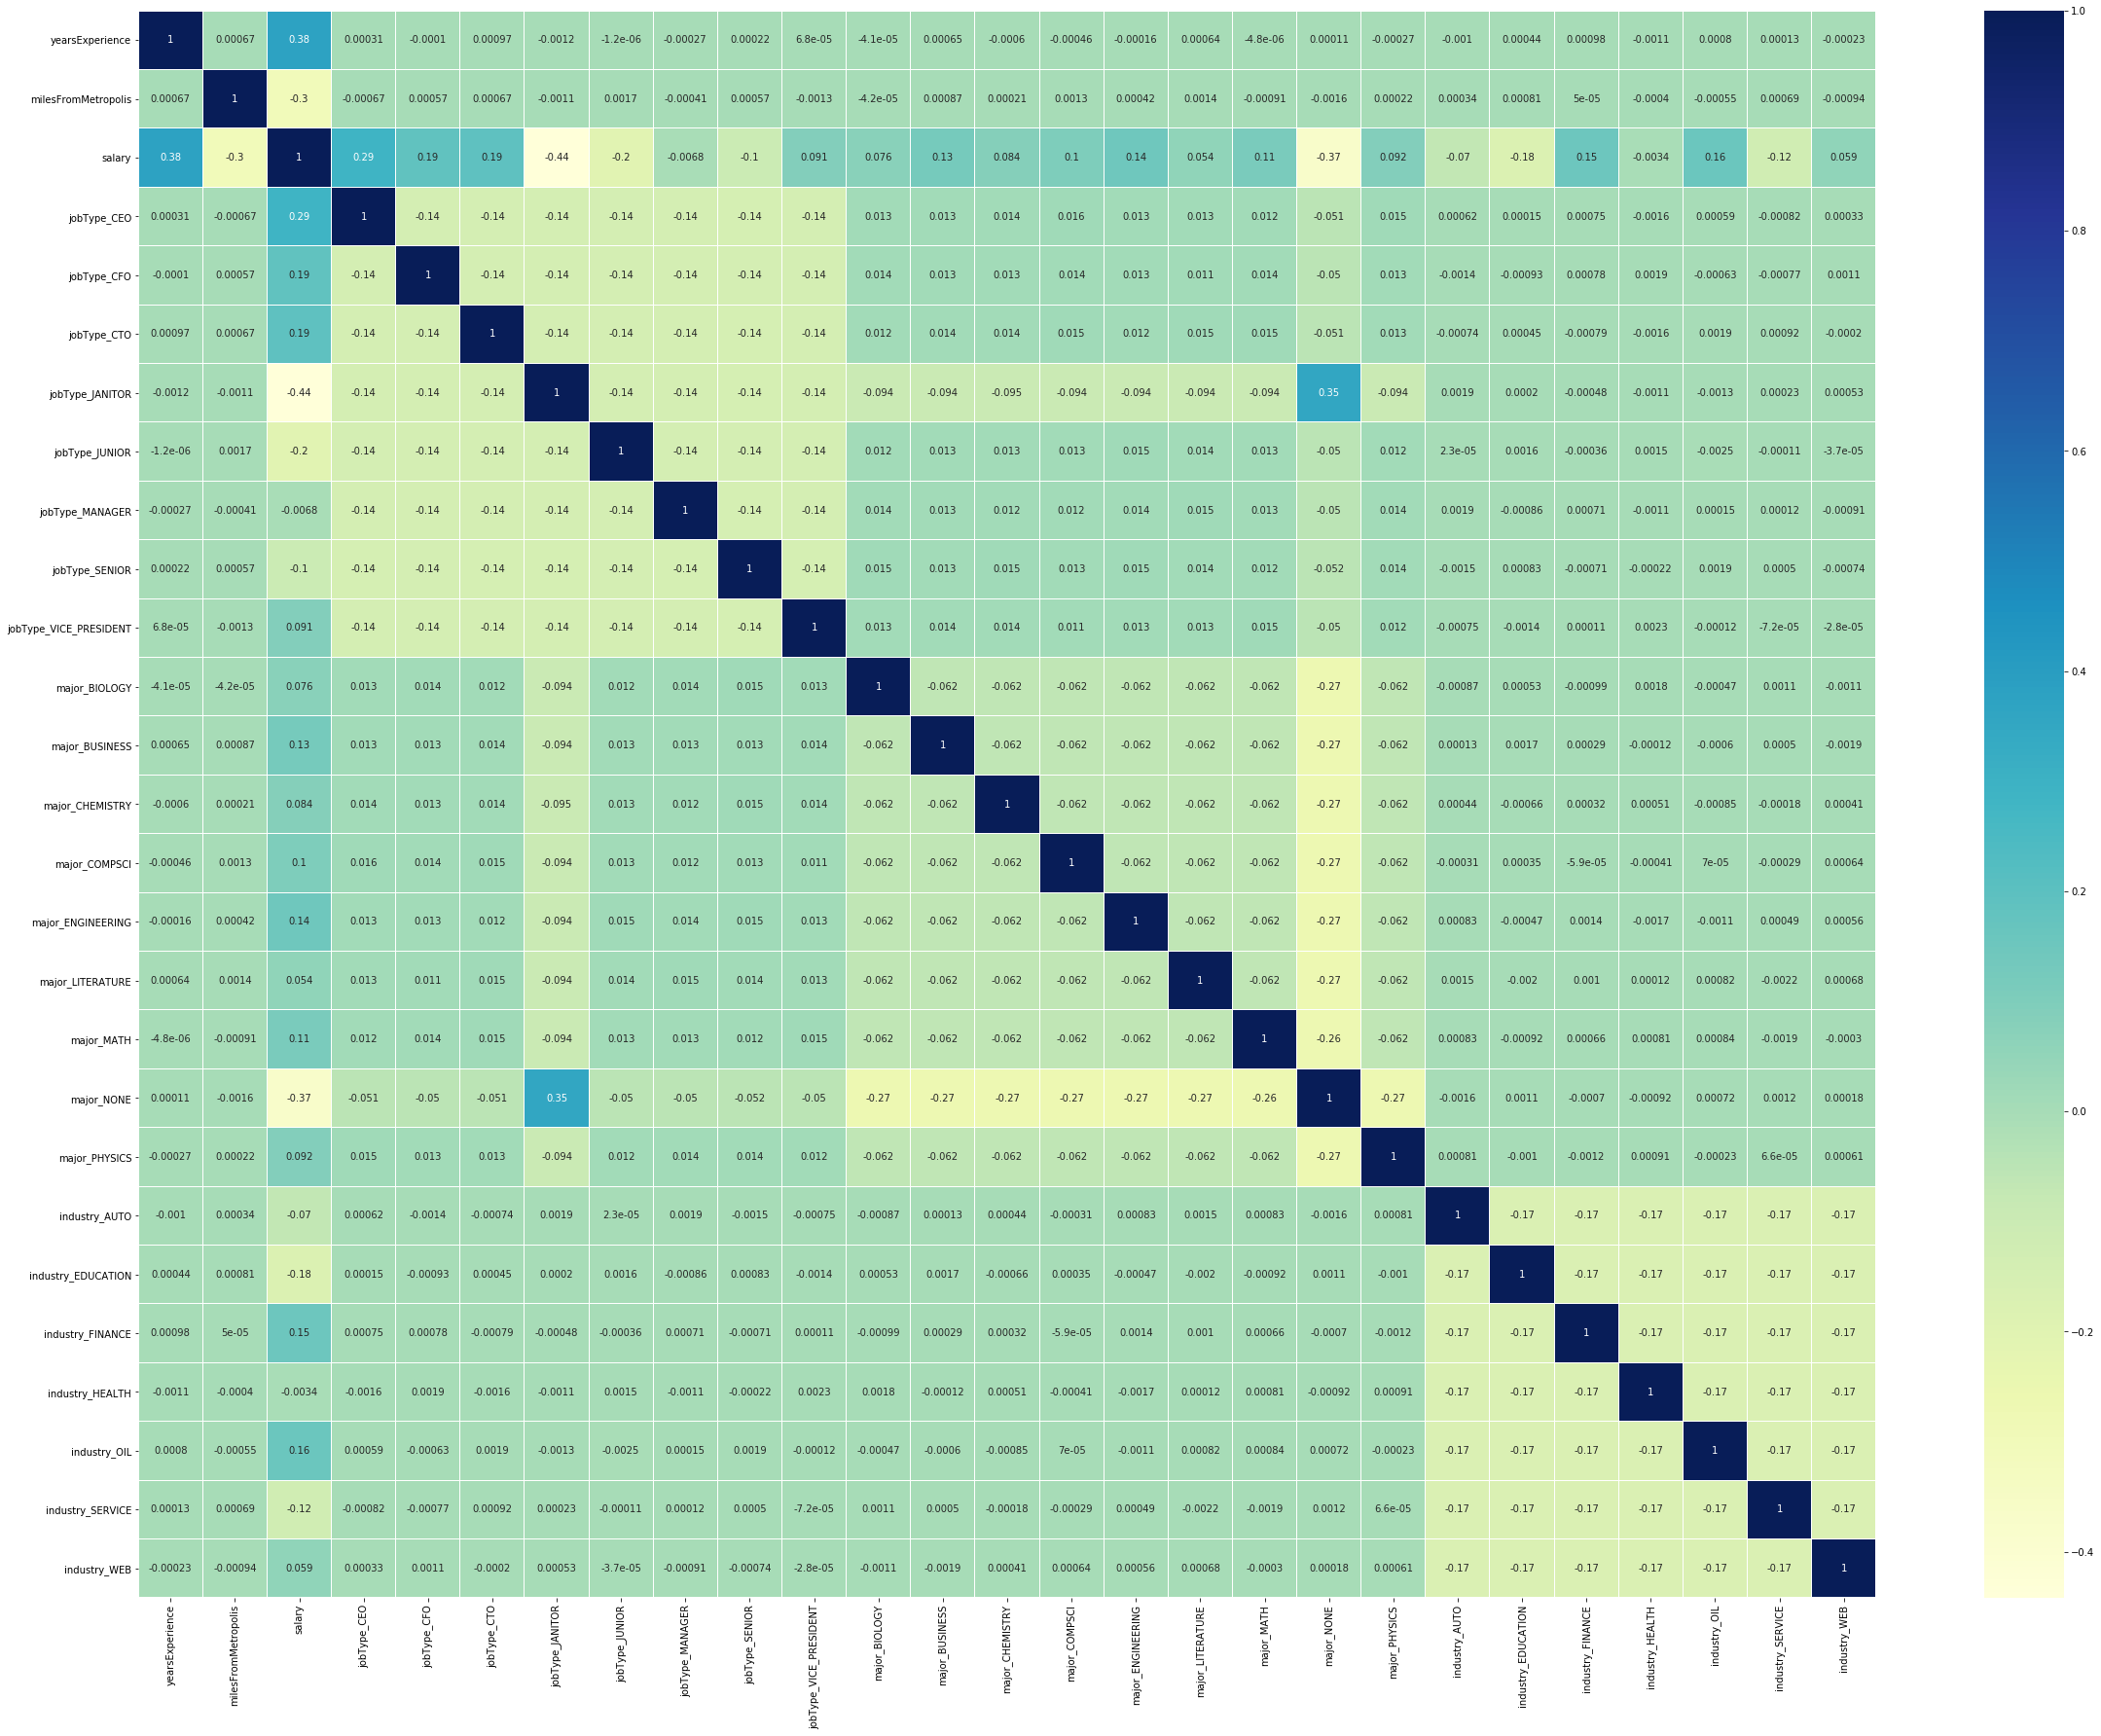

In [207]:
## plot heatmap of all correlation coefficients 
train_data_corr = train_data.corr()
plt.subplots(figsize=(40,30))
sns.heatmap(train_data_corr, cmap='YlGnBu', linewidth=.005, annot=True)

Years of experience has highest correlation with salary. Joy type also seems to be correlated with salary. 

### ---- 5 Establish a baseline ----

In order to create a training model the x and y variables will be assigned for the model to use and 20% of the training data will be split into testing data so that the model can be tested with known salaries. 

In [ ]:
#Assign salary to 'y' and all other features to 'x'. Split into training & testing variables
x = train_data[train_data.loc[ : , train_data.columns != 'salary'].columns]
y = train_data['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
print('Inputs: \n', x_train.head())
print('Outputs: \n', y_train.head())

In [ ]:
## creating a simple model and measuring its efficacy 

In [ ]:
##Linear regression 
lm = LinearRegression()
lm.fit(X_train, y_train)
lm

In [ ]:
print(lm.intercept_)
print(lm.coef_)

In [ ]:
## MSE of training data 
print("The MSE of prediction model is:", mean_square_error(y_train, yhat))

In [ ]:
## Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_train, y_train, cv=5)
print("5-Fold Cross Validation Accuracy (train data):", (np.mean(scores)), (np.std(scores)))


In [ ]:
##actual salaries vs predicted 
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
# Store linear regression predictions in variable
yhat_test = lm.predict(X_test)

# View first 5 predictions
yhat_test[0:5]

### ---- 6 Hypothesize solution ----

In [214]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [215]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [216]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [217]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [218]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [219]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [220]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data